In [3]:
import pandas as pd
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df=pd.read_csv(url,header=0, index_col=0, parse_dates=True, squeeze=True)
df.head()
dataframe = pd.DataFrame()
dataframe['month'] = [df.index[i].month for i in range(len(df))]
dataframe['day'] = [df.index[i].day for i in range(len(df))]
dataframe['temperature'] = [df[i] for i in range(len(df))]
print(dataframe.head(5))


   month  day  temperature
0      1    1         20.7
1      1    2         17.9
2      1    3         18.8
3      1    4         14.6
4      1    5         15.8


In [5]:
temps = pd.DataFrame(df.values)
dataframe = pd.concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

    t-1   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8


In [7]:
temps = pd.DataFrame(df.values)
dataframe = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-3', 't-2', 't-1', 't+1']
print(dataframe.head(5))

    t-3   t-2   t-1   t+1
0   NaN   NaN   NaN  20.7
1   NaN   NaN  20.7  17.9
2   NaN  20.7  17.9  18.8
3  20.7  17.9  18.8  14.6
4  17.9  18.8  14.6  15.8


In [8]:
temps = pd.DataFrame(df.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = pd.concat([means, temps], axis=1)
dataframe.columns = ['mean(t-2,t-1)', 't+1']
print(dataframe.head(5))

   mean(t-2,t-1)   t+1
0            NaN  20.7
1            NaN  17.9
2          19.30  18.8
3          18.35  14.6
4          16.70  15.8


In [9]:
temps = pd.DataFrame(df.values)
window = temps.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


In [18]:
import pandas as pd
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df=pd.read_csv(url)
map1={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['Date']=pd.to_datetime(df['Date'])
series=pd.DataFrame()
series['month']=df['Date'].dt.month
series['temp']=df['Temp']
series['year']=df['Date'].dt.year
series['day']=df['Date'].dt.day
series['weekday']=df['Date'].dt.day_of_week.map(map1)
series['leapyear']=df['Date'].dt.is_leap_year
series

,month,temp,year,day,weekday,leapyear
0,1,20.7,1981,1,Thursday,False
1,1,17.9,1981,2,Friday,False
2,1,18.8,1981,3,Saturday,False
3,1,14.6,1981,4,Sunday,False
4,1,15.8,1981,5,Monday,False
...,...,...,...,...,...,...
3645,12,14.0,1990,27,Thursday,False
3646,12,13.6,1990,28,Friday,False
3647,12,13.5,1990,29,Saturday,False
3648,12,15.7,1990,30,Sunday,False


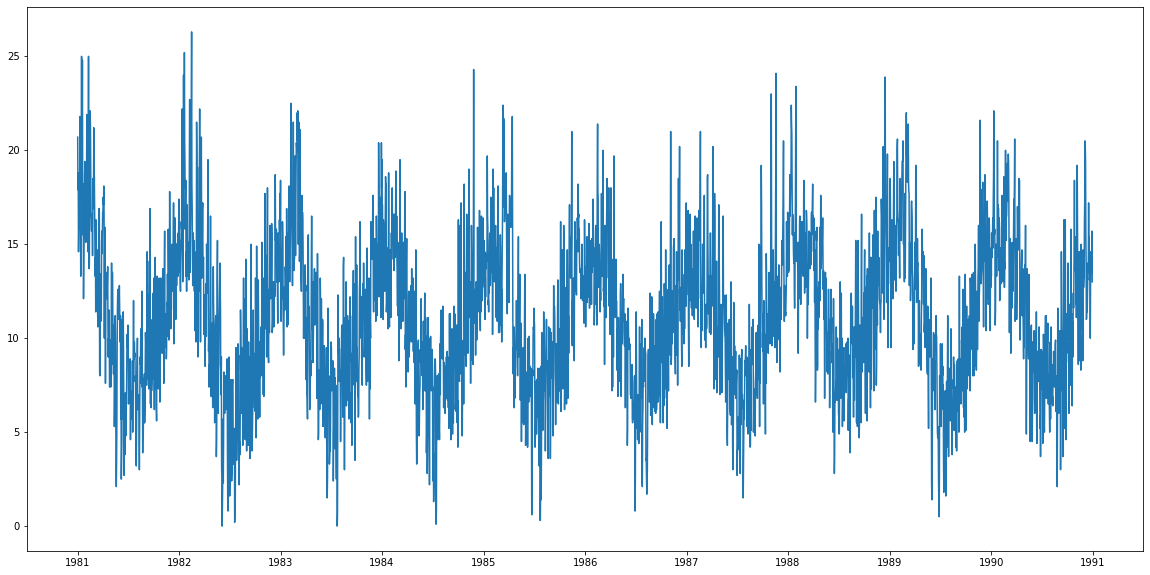

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(20,10))
x=df["Date"]
y=df["Temp"]
plt.plot(x,y)
plt.show()

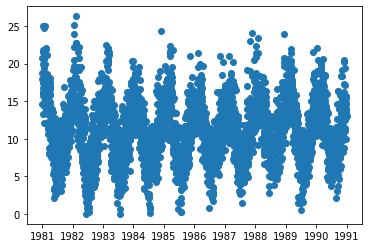

In [22]:
plt.scatter(df['Date'],df['Temp'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bb6078b20>]],
      dtype=object)

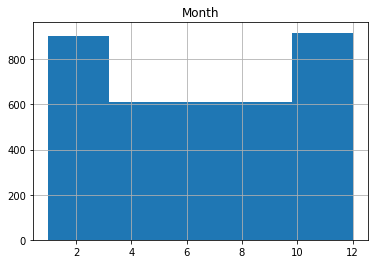

In [25]:
dataframe=pd.DataFrame(df)
data.hist(bins=5)